In [8]:
# House Price Prediction Project

## Objective
To predict the price of houses based on features like square footage, number of bedrooms, and age of the house using a linear regression model.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [12]:
# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 200
square_footage = np.random.randint(500, 5000, num_samples)
bedrooms = np.random.randint(1, 6, num_samples)
age = np.random.randint(0, 50, num_samples)  # Age of the house in years
price = (square_footage * 200) + (bedrooms * 10000) - (age * 500) + np.random.normal(0, 5000, num_samples)

# Create a DataFrame
data = pd.DataFrame({
    'SquareFootage': square_footage,
    'Bedrooms': bedrooms,
    'Age': age,
    'Price': price
})

# Save the dataset to a CSV file
data.to_csv('house_price_data.csv', index=False)


In [14]:
# Load the dataset
data = pd.read_csv('house_price_data.csv')

# Display the first few rows
print(data.head())

# Check for null values
print(data.isnull().sum())

# Basic statistics
print(data.describe())


   SquareFootage  Bedrooms  Age         Price
0           1360         1   42  2.594591e+05
1           4272         1   36  8.427129e+05
2           3592         3   11  7.452136e+05
3            966         3    2  2.169957e+05
4           4926         3    0  1.008438e+06
SquareFootage    0
Bedrooms         0
Age              0
Price            0
dtype: int64
       SquareFootage    Bedrooms        Age         Price
count     200.000000  200.000000  200.00000  2.000000e+02
mean     2765.835000    2.995000   25.04500  5.707572e+05
std      1238.219332    1.440608   14.33669  2.490190e+05
min       534.000000    1.000000    0.00000  1.248686e+05
25%      1773.000000    2.000000   12.00000  3.487779e+05
50%      2845.000000    3.000000   24.50000  5.892128e+05
75%      3779.500000    4.000000   37.00000  7.770597e+05
max      4996.000000    5.000000   49.00000  1.044279e+06


In [17]:
# Features and target variable
X = data[['SquareFootage', 'Bedrooms', 'Age']]
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [22]:
# Make predictions
predictions = model.predict(X_test)


In [24]:
# Calculate MAE and R-squared
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Absolute Error: 4092.1179073975377
R-squared: 0.9995035419318405


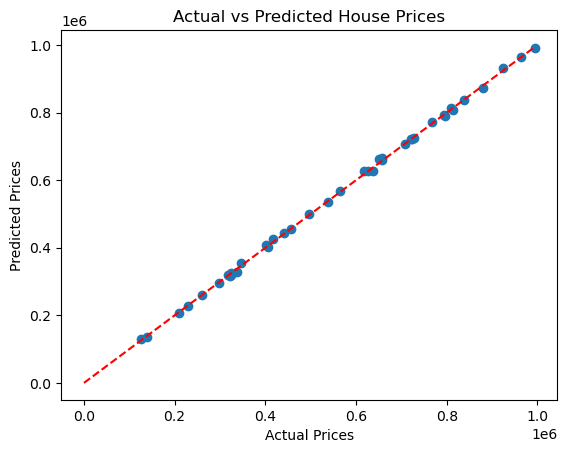

In [26]:
# Plotting
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Line of equality
plt.show()
